<a href="https://colab.research.google.com/github/licciard/fun-stuff/blob/main/math/lambdas4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modules

In [ ]:
import sympy
import mpmath
import numpy as np
mpmath.mp.dps = 100
print(mpmath.mp)
#sympy.init_session()
sympy.init_printing(use_latex=False)

import matplotlib.pyplot as plt
%matplotlib inline


Mpmath settings:
  mp.prec = 336               [default: 53]
  mp.dps = 100                [default: 15]
  mp.trap_complex = False     [default: False]


Polygamma

In [ ]:
from sympy.abc import x
fx = sympy.diff(sympy.loggamma(1+1/(2*(1-x))),x)
fx

           ⎛          1    ⎞
2⋅polygamma⎜0, 1 + ────────⎟
           ⎝       -2⋅x + 2⎠
────────────────────────────
                  2         
        (-2⋅x + 2)          

In [ ]:
sympy.diff(fx,x)

           ⎛          1    ⎞              ⎛          1    ⎞
8⋅polygamma⎜0, 1 + ────────⎟   4⋅polygamma⎜1, 1 + ────────⎟
           ⎝       -2⋅x + 2⎠              ⎝       -2⋅x + 2⎠
──────────────────────────── + ────────────────────────────
                  3                              4         
        (-2⋅x + 2)                     (-2⋅x + 2)          

In [ ]:
fx.evalf(10,subs={x:0})

0.01824498699

In [ ]:
px = sympy.loggamma(1+1/(2*(1-x)))
for n in range(1,11):
  px = sympy.diff(px,x)
  #val = px.evalf(20,subs={x:0})
  #ratio = val/sympy.gamma(n+1)
  #lgratio = ratio/mpmath.log(n+1)
  #print("n = {} --> px = {} / Gx = {} vs log = {}".format(n,val,ratio,lgratio))
val = px.evalf(20,subs={x:0})
ratio = val/sympy.gamma(n+1)
lgratio = ratio/mpmath.log(n+1)
print("n = {} --> px = {} / Gx = {} vs log = {}".format(n,val,ratio,lgratio))

n = 10 --> px = 2423742.6922609735693 / Gx = 0.66791851087438645538 vs log = 0.2785436538664668616501085767346554977561639562102875025812000319383632566372870640827940344511772604


Lambda at limits

In [ ]:
def LZ(n):
  return mpmath.log((1/n)*mpmath.zeta(1+1/n))

lzn = [0,0] + [LZ(n) for n in range(2,1001)]
print(lzn)


[0, 0, mpf('0.2671127221708399187230816171721368250435693924804044302351967290465066571867637463685871062008839366402'), mpf('0.1825820091118778532706322971032087927008297164898203054570732822097982984894354144821687388546793682471'), mpf('0.1386987308101199711902743558882771139783040303808411674541683276969273115121872001577354579855688003659'), mpf('0.1118244189615112819643540693281217445954781940604305031888046924982575350689452340180558409623683220774'), mpf('0.09367483425336964390152179600253300654458556598720501355637572268347768139688596020472049119531973606233'), mpf('0.08059439141539980581209356277800174008652821805906829200876608716960282783023757072799212410023964214438'), mpf('0.07071953097835155920106103672524315986522022548932583476027734232608992938649007661036999790347606603306'), mpf('0.06300046836170146055739870917646916138014821526093045148761030657563523396372218570802815482585751239403'), mpf('0.0568007048928622559887557854362018362904452486000061663053461068623599

In [ ]:
def lambda1(n):
  return n*lzn[n]

def lambda2(n):
  n = n  -1 
  c = n**2
  return 2*c*(lzn[n] - lzn[n+1])

def lambda3(n):
  n = n - 2
  c = n**3
  return 3*c*(lzn[n] - 2*lzn[n+1] - lzn[n+2])


for N in range(950,951):
  print("n = {} --> L1 = {}".format(N,lambda1(N)))
  print("n = {} --> L2 = {}".format(N,lambda2(N)))
  print("n = {} --> L3 = {}".format(N,lambda3(N)))

n = 950 --> L1 = 0.5771169754015123373216661093019621491256664380697094423939932168805848738225183423503859322764570218
n = 950 --> L2 = 1.152821730509228450558368261452702169633205798302285105726787150478303302219089798009676146585465891
n = 950 --> L3 = -3105389.093926691394209992086741630492417025582373458505324316801575745853948994567963532928989909397


In [ ]:
m = 15
xs = [sympy.S("1/{}".format(n)) for n in range(2,2+m)]

def LMO(i,j):
  if i < j: return 0
  if i == 0 and j == 0: return 1
  tot = 1
  for k in range(0,i+1):
    if k == j: continue
    tot /= (xs[j] - xs[k])
  return tot

ds = []
def UMO(i,j):
  if i == j and not i in ds:
    ds.append(i)  
    print("UMO at i=j={}".format(i))
  if i == j: return 1
  if j == 0: return 0
  if i == -1: return 0 
  return UMO(i-1,j-1)-UMO(i,j-1)*xs[j-1]

def AM(i,j):
  return xs[i]**j

def Zv(i,j):
  return LZ(1/xs[i]-1)

xs

[1/2, 1/3, 1/4, 1/5, 1/6, 1/7, 1/8, 1/9, 1/10, 1/11, 1/12, 1/13, 1/14, 1/15, 1
/16]

In [ ]:
Li = sympy.Matrix(m,m,LMO)
print(Li)

Ui = sympy.Matrix(m,m,UMO)
print(Ui)

A = sympy.Matrix(m,m,AM)
print(A)

Z = sympy.Matrix(m,1,Zv)
print(Z)

Matrix([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [6, -6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [24, -72, 48, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [80, -540, 960, -500, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [240, -3240, 11520, -15000, 6480, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [672, -17010, 107520, -262500, 272160, -100842, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1792, -81648, 860160, -3500000, 6531840, -5647152, 1835008, 0, 0, 0, 0, 0, 0, 0, 0], [4608, -367416, 6193152, -39375000, 117573120, -177885288, 132120576, -38263752, 0, 0, 0, 0, 0, 0, 0], [11520, -1574640, 41287680, -393750000, 1763596800, -4150656720, 5284823040, -3443737680, 900000000, 0, 0, 0, 0, 0, 0], [28160, -6495390, 259522560, -3609375000, 23279477760, -79900141860, 155021475840, -170465015160, 99000000000, -23579476910, 0, 0, 0, 0, 0], [67584, -25981560, 1557135360, -30937500000, 279353733120, -1342322383248, 3720515420160, -6136740545760, 5940000000000, -3112490952120, 681091006464, 0, 0, 0, 0], [159744, -101328084, 8996782080, -2

In [ ]:
Li

⎡   1          0             0               0                 0              
⎢                                                                             
⎢   6         -6             0               0                 0              
⎢                                                                             
⎢  24         -72           48               0                 0              
⎢                                                                             
⎢  80        -540           960             -500               0              
⎢                                                                             
⎢  240       -3240         11520           -15000             6480            
⎢                                                                             
⎢  672      -17010        107520          -262500            272160           
⎢                                                                             
⎢ 1792      -81648        860160          -3500000  

In [ ]:
Ai = Ui*Li
Ai

⎡                   -19683               131072              -244140625       
⎢ 8/42567525        ────────             ──────              ───────────      
⎢                   25625600             467775                9580032        
⎢                                                                             
⎢    -152            59049             -17170432             15869140625      
⎢   ───────          ──────            ──────────            ───────────      
⎢   6081075          582400              467775                4790016        
⎢                                                                             
⎢    712           -12065679           1027735552          -1883544921875     
⎢   ──────         ──────────          ──────────          ───────────────    
⎢   467775          1971200              467775                9580032        
⎢                                                                             
⎢   -26296          27575883          -37218025472  

In [ ]:
A*Ai

⎡1  0  0  0  0  0  0  0  0  0  0  0  0  0  0⎤
⎢                                           ⎥
⎢0  1  0  0  0  0  0  0  0  0  0  0  0  0  0⎥
⎢                                           ⎥
⎢0  0  1  0  0  0  0  0  0  0  0  0  0  0  0⎥
⎢                                           ⎥
⎢0  0  0  1  0  0  0  0  0  0  0  0  0  0  0⎥
⎢                                           ⎥
⎢0  0  0  0  1  0  0  0  0  0  0  0  0  0  0⎥
⎢                                           ⎥
⎢0  0  0  0  0  1  0  0  0  0  0  0  0  0  0⎥
⎢                                           ⎥
⎢0  0  0  0  0  0  1  0  0  0  0  0  0  0  0⎥
⎢                                           ⎥
⎢0  0  0  0  0  0  0  1  0  0  0  0  0  0  0⎥
⎢                                           ⎥
⎢0  0  0  0  0  0  0  0  1  0  0  0  0  0  0⎥
⎢                                           ⎥
⎢0  0  0  0  0  0  0  0  0  1  0  0  0  0  0⎥
⎢                                           ⎥
⎢0  0  0  0  0  0  0  0  0  0  1  0  0  0  0⎥
⎢                                 

In [ ]:
def ScaleMatrix(i,j):
  if i == j: return i
  return 0

S = sympy.Matrix(m,m,ScaleMatrix)
S

Lt = S*Ai*Z
Lt

⎡                                                  0                          
⎢                                                                             
⎢0.577215664897158500567497827798288092804497951516742935439811762559500914854
⎢                                                                             
⎢0.966885097500610451581163319064026187834519589998856162921091611150155265489
⎢                                                                             
⎢1.220696898079946747441228425545033990707782078277869884981318786850046760639
⎢                                                                             
⎢1.375589150164265784927463585253576370870829233345044400888771863761869177147
⎢                                                                             
⎢1.458245352676862336000051460889183998604858185159100353127307681089458434072
⎢                                                                             
⎢1.4886721149277062898027061653479111477025647805243

In [ ]:
 m = 7

xs = [sympy.S("-{}".format(n)) for n in range(1,m+1)]
xs

[-1, -2, -3, -4, -5, -6, -7]

In [ ]:
A = sympy.Matrix(m,m,AM)
A

⎡1  -1  1    -1    1      -1      1   ⎤
⎢                                     ⎥
⎢1  -2  4    -8    16    -32      64  ⎥
⎢                                     ⎥
⎢1  -3  9   -27    81    -243    729  ⎥
⎢                                     ⎥
⎢1  -4  16  -64   256   -1024    4096 ⎥
⎢                                     ⎥
⎢1  -5  25  -125  625   -3125   15625 ⎥
⎢                                     ⎥
⎢1  -6  36  -216  1296  -7776   46656 ⎥
⎢                                     ⎥
⎣1  -7  49  -343  2401  -16807  117649⎦

In [ ]:
def LMOP(i,j):
  if i < j: return 0
  val = 1/(sympy.gamma(j+1)*sympy.gamma(i-j+1))
  if (i+j) % 2:
    return -val
  return val

LPi = sympy.Matrix(m,m,LMOP)
LPi

⎡  1       0       0      0      0      0       0  ⎤
⎢                                                  ⎥
⎢  -1      1       0      0      0      0       0  ⎥
⎢                                                  ⎥
⎢ 1/2      -1     1/2     0      0      0       0  ⎥
⎢                                                  ⎥
⎢ -1/6    1/2    -1/2    1/6     0      0       0  ⎥
⎢                                                  ⎥
⎢ 1/24    -1/6    1/4   -1/6   1/24     0       0  ⎥
⎢                                                  ⎥
⎢-1/120   1/24   -1/12  1/12   -1/24  1/120     0  ⎥
⎢                                                  ⎥
⎣1/720   -1/120  1/48   -1/36  1/48   -1/120  1/720⎦

In [ ]:
def UMOP(i,j):
  return mpmath.stirling1(j+1,i+1,True)

UPi = sympy.Matrix(m,m,UMOP)
UPi

⎡1  -1  2   -6  24   -120   720 ⎤
⎢                               ⎥
⎢0  1   -3  11  -50  274   -1764⎥
⎢                               ⎥
⎢0  0   1   -6  35   -225  1624 ⎥
⎢                               ⎥
⎢0  0   0   1   -10   85   -735 ⎥
⎢                               ⎥
⎢0  0   0   0    1   -15    175 ⎥
⎢                               ⎥
⎢0  0   0   0    0    1     -21 ⎥
⎢                               ⎥
⎣0  0   0   0    0    0      1  ⎦

In [ ]:
Ai = UPi*LPi
Ai

⎡  7     -21      35     -35      21      -7      1   ⎤
⎢                                                     ⎥
⎢-223    879    -949                     1019    -49  ⎥
⎢─────   ───    ─────     82    -201/4   ────    ──── ⎥
⎢  20     20      12                      60      20  ⎥
⎢                                                     ⎥
⎢ 319   -3929           -2545           -1849    203  ⎥
⎢ ───   ──────  389/6   ──────  134/3   ──────   ───  ⎥
⎢  45    120              36             120      90  ⎥
⎢                                                     ⎥
⎢-37            -1219           -925             -49  ⎥
⎢────    71/6   ──────   88/3   ─────    41/6    ──── ⎥
⎢ 16              48              48              48  ⎥
⎢                                                     ⎥
⎢  59            247    -113      69     -19      35  ⎥
⎢ ───    -9/4    ───    ─────     ──     ────    ───  ⎥
⎢ 144             48      18      16      12     144  ⎥
⎢                                               

In [ ]:
 def ZPv(i,j):
  #if i != j:
  #  return 0
  return mpmath.log((xs[i]/(1-xs[i]))*mpmath.zeta(1/(1-xs[i])))

Zp = sympy.Matrix(m,1,ZPv)
print(Zp)

Matrix([[-0.3144679600611682102986513799438300294462473916162698340886361688018663635547152223046466744035192706], [-0.4324661284632169569180891081029358951720805115970743087886741439750711291528307482461946421553588580], [-0.4943638586094057280457658444757172596226364469200588358242001811300960236640420438720864950389416471], [-0.5324975392341676779597858917708283491126563038259523773216077131424769972672619200922860278599999949], [-0.5583517801234269176881000242793011345501960944477541871569387994586042073765875838151805617930338936], [-0.5770363109995304005587213109079869704303855202060794106321714896687507389448358472609135189856961900], [-0.5911707775470656697800462516801302649724199746334593537465804528741073975008764231295989303745791614]])


In [ ]:
def SignMatrix(i,j):
  if i != j: return 0
  return (1,-1)[i%2]

SMp = sympy.Matrix(m,m,SignMatrix)
Ai = (SMp*Ai)
Ai
#SMp

⎡  7     -21     35     -35     21      -7      1  ⎤
⎢                                                  ⎥
⎢ 223   -879     949                  -1019    49  ⎥
⎢ ───   ─────    ───    -82    201/4  ──────   ──  ⎥
⎢  20     20      12                    60     20  ⎥
⎢                                                  ⎥
⎢ 319   -3929          -2545          -1849    203 ⎥
⎢ ───   ──────  389/6  ──────  134/3  ──────   ─── ⎥
⎢  45    120             36            120      90 ⎥
⎢                                                  ⎥
⎢ 37            1219            925            49  ⎥
⎢ ──    -71/6   ────   -88/3    ───   -41/6    ──  ⎥
⎢ 16             48              48            48  ⎥
⎢                                                  ⎥
⎢  59            247   -113     69     -19      35 ⎥
⎢ ───    -9/4    ───   ─────    ──     ────    ─── ⎥
⎢ 144             48     18     16      12     144 ⎥
⎢                                                  ⎥
⎢        -13     25             23     -11    

In [ ]:
A*Ai

⎡1  0  0  0  0  0  0⎤
⎢                   ⎥
⎢0  1  0  0  0  0  0⎥
⎢                   ⎥
⎢0  0  1  0  0  0  0⎥
⎢                   ⎥
⎢0  0  0  1  0  0  0⎥
⎢                   ⎥
⎢0  0  0  0  1  0  0⎥
⎢                   ⎥
⎢0  0  0  0  0  1  0⎥
⎢                   ⎥
⎣0  0  0  0  0  0  1⎦

In [ ]:
Ai*Zp

⎡ -0.0621121839762712671390843193058135728731853226627958112661273515267773363
⎢                                                                             
⎢  0.3638796490671174428373250662730566640478627056184078977030191827461115823
⎢                                                                             
⎢  0.1418307140204102267025424886893542022884671402977088940190075953217453200
⎢                                                                             
⎢ 0.03514488106312339517625172110977552330043753365632078001777823477424754964
⎢                                                                             
⎢ 0.00525290592839460436354944453998654127996254156770267783227580890346652205
⎢                                                                             
⎢0.000429577157431928070373726882487329416603687628283368800779424444116728881
⎢                                                                             
⎣0.0000147112539709918582915203979623166234121760841

In [ ]:
m = 150

xs = [sympy.S("-{}".format(n)) for n in range(1,m+1)]
xs

[-1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -
18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31, -32, -33,
 -34, -35, -36, -37, -38, -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -4
9, -50, -51, -52, -53, -54, -55, -56, -57, -58, -59, -60, -61, -62, -63, -64, 
-65, -66, -67, -68, -69, -70, -71, -72, -73, -74, -75, -76, -77, -78, -79, -80
, -81, -82, -83, -84, -85, -86, -87, -88, -89, -90, -91, -92, -93, -94, -95, -
96, -97, -98, -99, -100, -101, -102, -103, -104, -105, -106, -107, -108, -109,
 -110, -111, -112, -113, -114, -115, -116, -117, -118, -119, -120, -121, -122,
 -123, -124, -125, -126, -127, -128, -129, -130, -131, -132, -133, -134, -135,
 -136, -137, -138, -139, -140, -141, -142, -143, -144, -145, -146, -147, -148,
 -149, -150]

In [ ]:
LPi = sympy.Matrix(m,m,LMOP)
print("Done LPi")
#print(LPi)
UPi = sympy.Matrix(m,m,UMOP)
print("Done UPi")
#print(UPi)
SMp = sympy.Matrix(m,m,SignMatrix)
print("Done SMp")
Zp = sympy.Matrix(m,1,ZPv)
print(Zp)

Done LPi
Done UPi
Done SMp
Matrix([[-0.3144679600611682102986513799438300294462473916162698340886361688018663635547152223046466744035192706], [-0.4324661284632169569180891081029358951720805115970743087886741439750711291528307482461946421553588580], [-0.4943638586094057280457658444757172596226364469200588358242001811300960236640420438720864950389416471], [-0.5324975392341676779597858917708283491126563038259523773216077131424769972672619200922860278599999949], [-0.5583517801234269176881000242793011345501960944477541871569387994586042073765875838151805617930338936], [-0.5770363109995304005587213109079869704303855202060794106321714896687507389448358472609135189856961900], [-0.5911707775470656697800462516801302649724199746334593537465804528741073975008764231295989303745791614], [-0.6022370239100066274412068210769534425769891368921618520144798554060938968698241103961963635074261772], [-0.6111363778646681440568863202194790595201160505806680430852047193297801218656475858259992132093006140], [-

In [ ]:
LPiZp = LPi*Zp
UPiLPiZp = UPi*LPiZp
ULt = SMp*UPiLPiZp

S = sympy.Matrix(m,m,ScaleMatrix)
Lt = ULt
Lt
#Ai = UPi*LPi

⎡              -0.001940530539568505710934731794228938899519395252474152139146
⎢                                                                             
⎢               0.564712355133895478715238139560697190804257735600836611569679
⎢                                                                             
⎢               0.444044023522699767963642610839824590002937218789706600968846
⎢                                                                             
⎢                0.32488935835658347315121133436818472722274484280936642578173
⎢                                                                             
⎢               0.215305749750291469367679904785881777710619253151147600300775
⎢                                                                             
⎢               0.127244724760818707771991258316830340901977336689505951379905
⎢                                                                             
⎢               0.0666659204626790131017902890680720

Series expansion

In [ ]:
mpmath.mp.dps = 50

def DP(p):
  terms = []
  for q in range(0,p+1):
    term = mpmath.log(-(q+1)/(q+2) * mpmath.zeta(1/(q+2)))/(sympy.gamma(q+1)*sympy.gamma(p-q+1))
    terms.append(term * (1,-1)[q%2])
  return sum(terms)

for n in range(850,1000):
  print("{} --> {}".format(n,DP(n)*(n+1)/(2*DP(n-1))))



850 --> 1.0089375662185360042282087915728652782602595943267
851 --> 1.0077281591909069576168419511556205857618799706564
852 --> 1.0065172450613632185061404880009189551012418708959
853 --> 1.0053007068255579173803037913895277069286130972712
854 --> 1.0040746173908564188941704569034893898465789284149
855 --> 1.0028351879540243828394006843954286935547046036445
856 --> 1.001578718102702433440963381471505504915510348749
857 --> 1.0003015466612510116836480954637668439430425511134
858 --> 0.99900000232869408941557735413909225357266060516181
859 --> 0.99767035314031034199229160650843671304879988840988
860 --> 0.99630875372475173754061046840703903488383562871479
861 --> 0.99491118922247736675809553683296384748337478805091
862 --> 0.9934734145727731091129020149562844138117652878244
863 --> 0.99199088765603980666814283351185631967093123910504
864 --> 0.99045869448115215476705040968873893616730476970758
865 --> 0.9888714642143112449010538405345931809452158415336
866 --> 0.9872232713276706980474728

KeyboardInterrupt: ignored

In [ ]:
mpmath.mp.dps = 200

for sn in range(1,50):
  print("St1({},2) = {}".format(sn,mpmath.stirling1(sn+1,2,True)*(1,-1)[(sn-1)%2]))

In [ ]:
def LTN(n,nmax = 100):
  if n == 0: return 0
  terms = []
  for p in range(n,nmax+1):
    terms.append(mpmath.stirling1(p+1,n+1,True)*DP(p)*(1,-1)[(p-n)%2])
  return sum(terms)

for nm in range(40,50):
  print("nm = {} --> L({}) = {}".format(nm,3,3*LTN(3,nm)))

In [ ]:
mpmath.mp.dps = 200

def D(p):
  terms = []
  for q in range(0,p+1):
    term = mpmath.log(-(q+1)/(q+2) * mpmath.zeta(1/(q+2)))/(sympy.gamma(q+1)*sympy.gamma(p-q+1))
    terms.append(term * (1,-1)[q%2])
  return sum(terms)*sympy.gamma(p+1)

def LTOne(nmax):
  terms = []
  for p in range(1,nmax+1):
    terms.append(sympy.harmonic(p)*D(p))
  return sum(terms)

for nm in range(100,105):
  print("{} --> {}".format(nm,LTOne(nm)))

In [ ]:
def LInt(q):
  return mpmath.log(-(q+1)/(q+2) * mpmath.zeta(1/(q+2)))

N = 1000
dn = range(0,N)

#lin = [-LInt(n) for n in dn]
dpn = []
for n in dn:
  if n % 25 == 0:
    print(n)
  dpn.append(DP(n+1)*(n+2)/(2*DP(n)))

plt.figure(figsize=(15,10))

plt.plot(dn, dpn, 'k.')

#plt.xscale('log')
#plt.yscale('log')

axes = plt.gca()
#axes.set_xlim([0,10])
#axes.set_ylim([0,5])
plt.show()

In [ ]:
plt.figure(figsize=(15,10))

plt.plot(dn, dpn, 'k.')

#plt.xscale('log')
#plt.yscale('log')

axes = plt.gca()
#axes.set_xlim([0,10])
axes.set_ylim([-10,10])
plt.show()

In [ ]:
import scipy.optimize as opt
import numpy as np

def ZPvPlot(n):
  return mpmath.log(-(n+1)/(n+2)*mpmath.zeta(1/(n+2)))

def mypow(x, a, b):
  return np.log(a*(x**b) + 0.5) 

N = 1000
dn = np.arange(0,N)
ZpPlot = np.array([(ZPvPlot(n)-mpmath.log(0.5)) for n in dn])



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in power
  


[8.11991813e-01 2.75030848e-09]


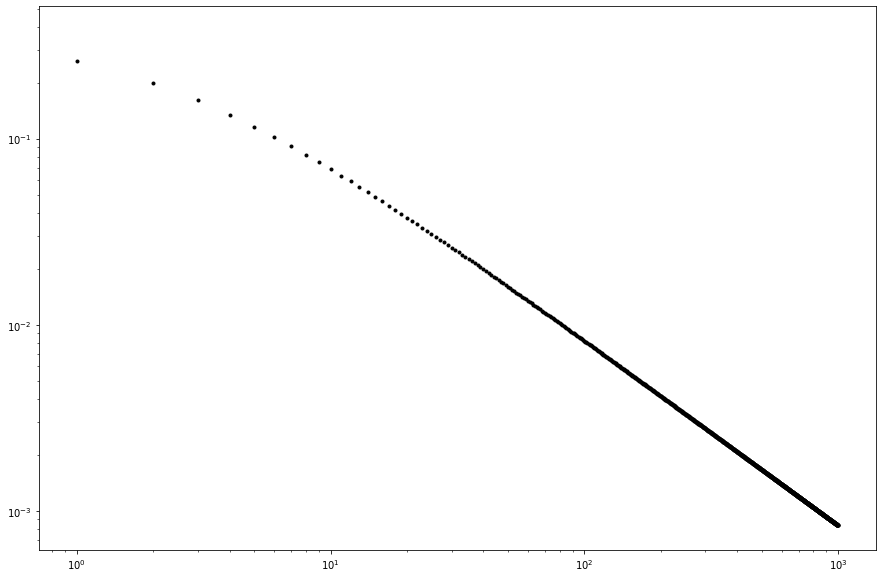

In [ ]:
popt, pcov = opt.curve_fit(mypow,  dn,  ZpPlot,  p0=(1,1))
print(popt)

plt.figure(figsize=(15,10))
plt.plot(dn, ZpPlot, 'k.')
#plt.plot(dn,mypow(dn,*popt),'r-')
plt.xscale('log')
plt.yscale('log')
plt.show()

[ 1.0010861  -0.90988663]


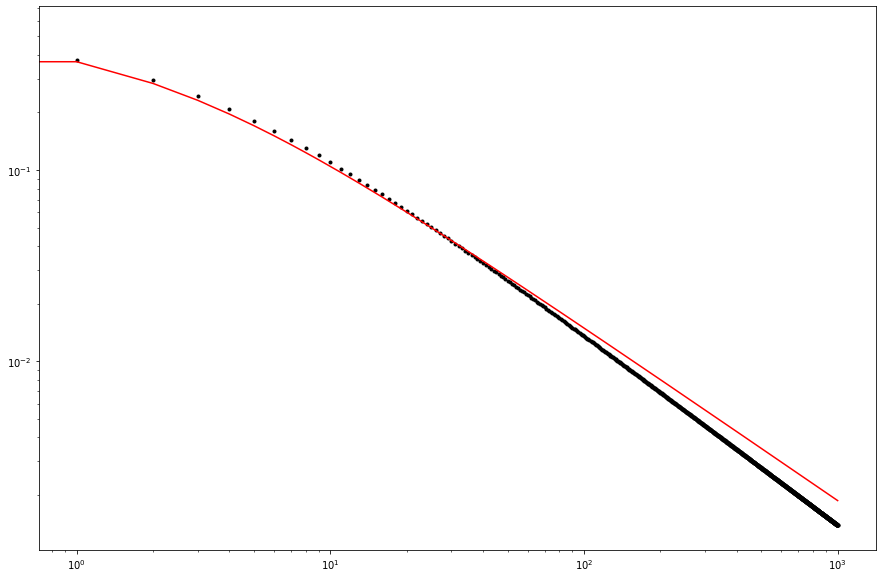

In [ ]:
     dn = np.arange(0,1000)

def mypow(x, a, b):
  return a*(x+2)**b

ZpDif = np.array([-(ZpPlot[n]+np.log(0.5))/(n+2) for n in dn])

popt, pcov = opt.curve_fit(mypow,  dn,  ZpDif,  p0=(1,1))
print(popt)

plt.figure(figsize=(15,10))
plt.plot(dn, ZpDif, 'k.')
#plt.plot(dn,[n for n in dn],'r-')
plt.plot(dn,mypow(dn,*popt),'r-')

plt.xscale('log')
plt.yscale('log')
plt.show()

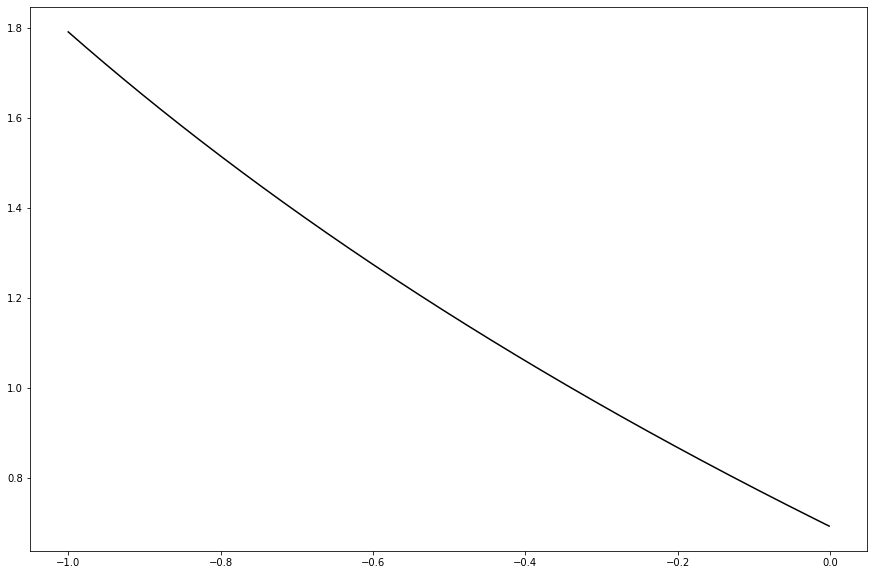

In [ ]:
ds = np.arange(-1,0,0.001)
ls = np.array([-mpmath.log((s-1)*mpmath.zeta(s)) for s in ds])

plt.figure(figsize=(15,10))
plt.plot(ds, ls, 'k-')
#plt.xscale('log')
#plt.yscale('log')
plt.show()

[1.23397549 1.36624673]


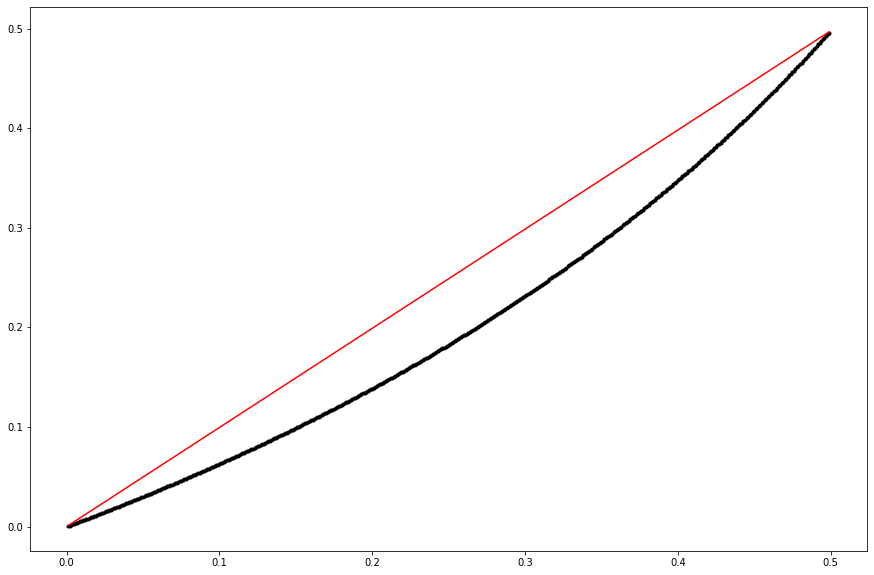

In [ ]:
dz = np.arange(0.001,0.5,0.001)
lz = np.array([mpmath.log(z/(1-z)*mpmath.zeta(1/(1-z))) for z in dz])

def mypow(x, a, b):
  return a*(x**b) 

popt, pcov = opt.curve_fit(mypow,  dz,  lz,  p0=(1,1))
print(popt)

plt.figure(figsize=(15,10))
plt.plot(dz, lz, 'k.')
plt.plot(dz,mypow(dz,2*mpmath.log(mpmath.zeta(2)),1),'r-')
#plt.xscale('log')
#plt.yscale('log')
plt.show()

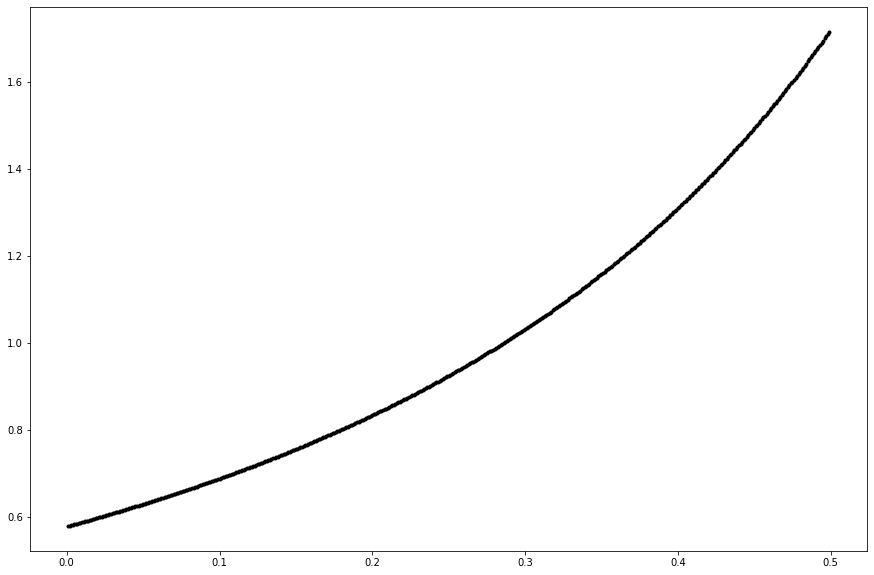

In [ ]:
dz = np.arange(0.001,0.5,0.001)
lz = np.array([(1/(z*(1-z))*(1 + (z/(1-z))  * (mpmath.zeta(1/(1-z),derivative=1)/mpmath.zeta(1/(1-z))))) for z in dz])

#def mypow(x, a, b):
#  return a*(x**b) 

#popt, pcov = opt.curve_fit(mypow,  dz,  lz,  p0=(1,1))
#print(popt)

plt.figure(figsize=(15,10))
plt.plot(dz, lz, 'k.')
#plt.plot(dz,mypow(dz,2*mpmath.log(mpmath.zeta(2)),1),'r-')
#plt.xscale('log')
#plt.yscale('log')
plt.show()

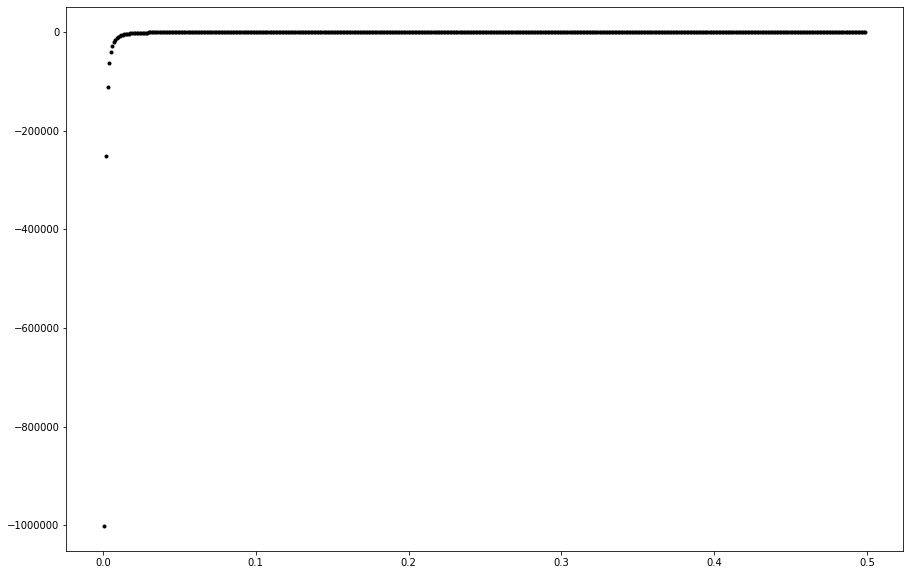

In [ ]:
dz = np.arange(0.001,0.5,0.001)
lz = np.array([(-1/(z*(1-z))**2)*(1 - (z/(1-z))*(mpmath.zeta(1/(1-z),derivative=1)/mpmath.zeta(1/(1-z))) - ((z/(1-z))**2) * (mpmath.zeta(1/(1-z),derivative=2)/mpmath.zeta(1/(1-z)) - (mpmath.zeta(1/(1-z),derivative=1)/mpmath.zeta(1/(1-z)))**2)) for z in dz])

#def mypow(x, a, b):
#  return a*(x**b) 

#popt, pcov = opt.curve_fit(mypow,  dz,  lz,  p0=(1,1))
#print(popt)

plt.figure(figsize=(15,10))
plt.plot(dz, lz, 'k.')
#plt.plot(dz,mypow(dz,2*mpmath.log(mpmath.zeta(2)),1),'r-')
#plt.xscale('log')
#plt.yscale('log')
plt.show()

In [ ]:
from sympy.abc import x
lx = sympy.log((x/(1-x))*sympy.zeta(1/(1-x)))
lx1 = sympy.diff(lx,x)
lx2 = sympy.diff(lx1,x)
lx3 = sympy.diff(lx2,x)
lx4 = sympy.diff(lx3,x)

#lx.evalf(10,subs={x:1/2})
lx1.evalf(10,subs={x:0.1})

           ⎛                ⎛ d        ⎞│                     ⎞
           ⎜   ⎛  1   ⎞   x⋅⎜───(ζ(ξ₁))⎟│     1       ⎛  1   ⎞⎟
           ⎜x⋅ζ⎜──────⎟     ⎝dξ₁       ⎠│ξ₁=──────   ζ⎜──────⎟⎟
           ⎜   ⎝-x + 1⎠                     -x + 1    ⎝-x + 1⎠⎟
(-x + 1.0)⋅⎜─────────── + ──────────────────────── + ─────────⎟
           ⎜          2                   3           -x + 1.0⎟
           ⎝(-x + 1.0)          (-x + 1.0)                    ⎠
───────────────────────────────────────────────────────────────
                             ⎛  1   ⎞                          
                          x⋅ζ⎜──────⎟                          
                             ⎝-x + 1⎠                          

In [ ]:
dx = np.arange(0.001,0.5,0.001)

lxs = np.array([lx.evalf(10,subs={x:xi}) for xi in dx])
lx1s = np.array([lx1.evalf(10,subs={x:xi}) for xi in dx])
#lx2s = np.array([lx2.evalf(10,subs={x:xi}) for xi in dx])
#lx3s = np.array([lx3.evalf(10,subs={x:xi}) for xi in dx])
#lx4s = np.array([lx4.evalf(10,subs={x:xi}) for xi in dx])

In [ ]:
lx1s

array([(-x + 1.0)*(x*zeta(1/(-x + 1))/(-x + 1.0)**2 + x*Subs(Derivative(zeta(_xi_1), _xi_1), (_xi_1,), (1/(-x + 1),))/(-x + 1.0)**3 + zeta(1/(-x + 1))/(-x + 1.0))/(x*zeta(1/(-x + 1))),
       (-x + 1.0)*(x*zeta(1/(-x + 1))/(-x + 1.0)**2 + x*Subs(Derivative(zeta(_xi_1), _xi_1), (_xi_1,), (1/(-x + 1),))/(-x + 1.0)**3 + zeta(1/(-x + 1))/(-x + 1.0))/(x*zeta(1/(-x + 1))),
       (-x + 1.0)*(x*zeta(1/(-x + 1))/(-x + 1.0)**2 + x*Subs(Derivative(zeta(_xi_1), _xi_1), (_xi_1,), (1/(-x + 1),))/(-x + 1.0)**3 + zeta(1/(-x + 1))/(-x + 1.0))/(x*zeta(1/(-x + 1))),
       (-x + 1.0)*(x*zeta(1/(-x + 1))/(-x + 1.0)**2 + x*Subs(Derivative(zeta(_xi_1), _xi_1), (_xi_1,), (1/(-x + 1),))/(-x + 1.0)**3 + zeta(1/(-x + 1))/(-x + 1.0))/(x*zeta(1/(-x + 1))),
       (-x + 1.0)*(x*zeta(1/(-x + 1))/(-x + 1.0)**2 + x*Subs(Derivative(zeta(_xi_1), _xi_1), (_xi_1,), (1/(-x + 1),))/(-x + 1.0)**3 + zeta(1/(-x + 1))/(-x + 1.0))/(x*zeta(1/(-x + 1))),
       (-x + 1.0)*(x*zeta(1/(-x + 1))/(-x + 1.0)**2 + x*Subs(Derivative(zet

TypeError: ignored

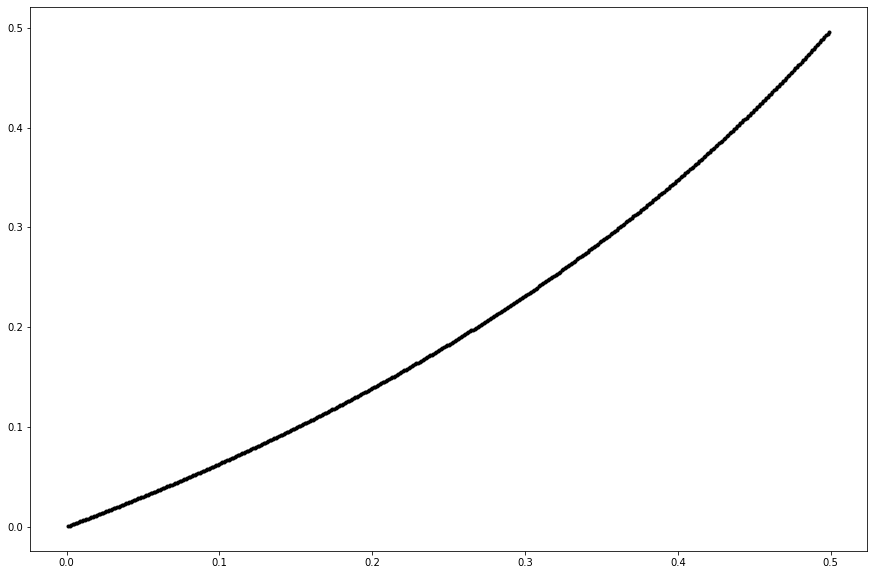

In [ ]:
plt.figure(figsize=(15,10))

plt.plot(dx, lxs, 'k.')
plt.plot(dx, lx1s, 'r.')
#plt.plot(dx, lxs, 'k.')
#plt.plot(dx, lxs, 'k.')

#plt.plot(dz,mypow(dz,2*mpmath.log(mpmath.zeta(2)),1),'r-')
#plt.xscale('log')
#plt.yscale('log')
plt.show()